In [9]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

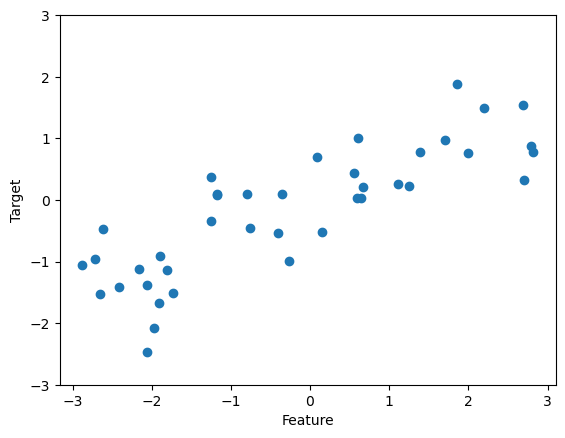

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [151]:
class OrdinaryLeastSquares:
    def __init__(self):
        self.w = None
        self.b = None
        self.alpha = 0.5
    def fit(self,X_train, y_train):
        m = X_train.shape[0]
        num_features = X_train.shape[1]
        self.w = np.zeros(num_features)
        self.b = 0.0
        previous_cost = math.inf
        while True:
            cost = 0
            dJ_dw = np.zeros(num_features)
            dJ_db = 0.0
            for i in range(m):
                y_hat = np.dot(self.w,X_train[i])+self.b
                error = y_hat-y_train[i]
                for j in range(num_features):
                    dJ_dw[j]+=(error)*X_train[i,j]
                dJ_db+=error
                cost += error**2
            dJ_db = dJ_db/m
            dJ_dw = dJ_dw/m
            cost = cost/(2*m)
            #update weights
            self.w = self.w - self.alpha*dJ_dw
            self.b = self.b - self.alpha*dJ_db
            if np.abs(previous_cost-cost)<=1e-5:
                break
            previous_cost = cost
    def predict(self, X):
#         predicted_values = []
#         for i in range(X.shape[0]):
#             predicted_value = np.dot(self.w,X[i])+self.b
#             predicted_values.append(predicted_value)
#         return predicted_values
        predicted_value = np.dot(self.w.reshape(-1,1),X.T)+self.b
        return predicted_value

In [154]:
reg = OrdinaryLeastSquares()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

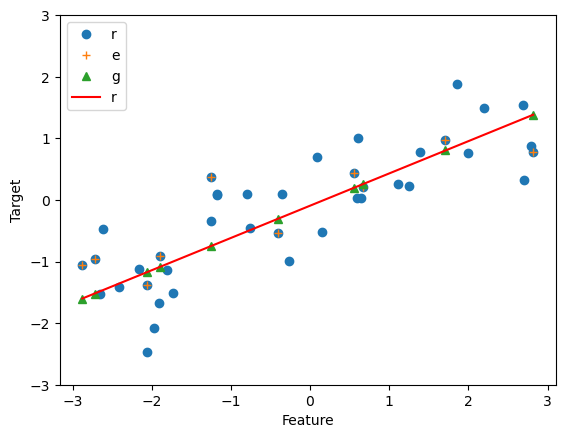

In [160]:
#plot results
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

plt.plot(X_test,y_test,'+')
plt.plot(X_test,y_pred[0],'^')
#plot line
x_min = X[:,0].min()
x_max = X[:,0].max()
y_min = reg.w*x_min+reg.b
y_max = reg.w*x_max+reg.b
plt.plot([x_min,x_max],[y_min,y_max],color='r')
plt.legend('regression line')
